In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

The Hamiltonian for a Charge qubits is \\ 
$H = \sum_n 4E_c(n_g - n)^2|n\rangle\langle n| - \frac{1}{2}E_J\sum_n|n+1\rangle\langle n| + |n\rangle\langle n+1|$ 

In [10]:
def hamiltonian(Ec, Ej, N, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

In [11]:
def plot_energies(ng_vec, energies, ymax=(20, 3)):
    """
    Plot energy levels as a function of bias parameter ng_vec.
    """
    fig, axes = plt.subplots(1,2, figsize=(16,6))

    for n in range(len(energies[0,:])):
        axes[0].plot(ng_vec, energies[:,n])
    axes[0].set_ylim(-2, ymax[0])
    axes[0].set_xlabel(r'$n_g$', fontsize=18)
    axes[0].set_ylabel(r'$E_n$', fontsize=18)

    for n in range(len(energies[0,:])):
        axes[1].plot(ng_vec, (energies[:,n]-energies[:,0])/(energies[:,1]-energies[:,0]))
    axes[1].set_ylim(-0.1, ymax[1])
    axes[1].set_xlabel(r'$n_g$', fontsize=18)
    axes[1].set_ylabel(r'$(E_n-E_0)/(E_1-E_0)$', fontsize=18)
    return fig, axes

In [12]:
def visualize_dynamics(result, ylabel):
    """
    Plot the evolution of the expectation values stored in result.
    """
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(result.times, result.expect[0])

    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(r'$t$', fontsize=16);

***Charge qubit Regime***

In [38]:
N = 10
Ec = 1.0
Ej = 1.0 #=50.0 for transmon

In [39]:
ng_vec = np.linspace(-4, 4, 200)

In [40]:
energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])


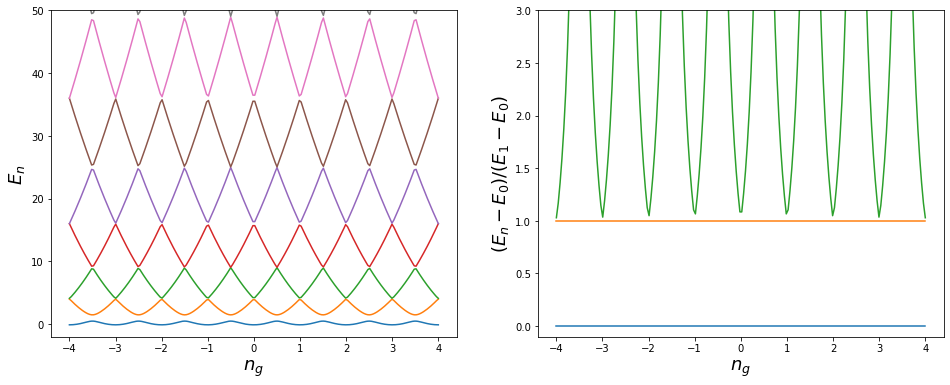

In [41]:
plot_energies(ng_vec, energies, ymax=(50, 3));


In [42]:
H = hamiltonian(Ec, Ej, N, 0.5)

In [43]:
H

Quantum object: dims = [[21], [21]], shape = (21, 21), type = oper, isherm = True
Qobj data =
[[441.   -0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ -0.5 361.   -0.5   0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.   -0.5 289.   -0.5   0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.   -0.5 225.   -0.5   0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.   -0.5 169.   -0.5   0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.   -0.5 121.   -0.5   0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.   -0.5  81.   -0.5   0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0

In [44]:
evals, ekets = H.eigenstates()


In [45]:
evals

array([  0.47065435,   1.46676684,   9.01371984,   9.01760693,
        25.00520901,  25.00520943,  49.00260427,  49.00260427,
        81.00156252,  81.00156252, 121.00104167, 121.00104167,
       169.00074405, 169.00074405, 225.00055804, 225.00055804,
       289.00043403, 289.00043411, 361.00034728, 361.00347214,
       441.00312494])

In [46]:
ekets[0].full() > 0.4

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [47]:
psi_g = ekets[0] # basis(2, 0)
psi_e = ekets[1] # basis(2, 1)

#psi_g = basis(2, 0)
#psi_e = basis(2, 1)

In [48]:
sx = psi_g * psi_e.dag() + psi_e * psi_g.dag()
sz = psi_g * psi_g.dag() - psi_e * psi_e.dag()

In [49]:
evals[1]-evals[0]

0.9961124875822172

In [50]:
H0 = 0.5 * (evals[1]-evals[0]) * sz

A = 0.25  # some driving amplitude
Hd = 0.5 * A * sx # obtained by driving ng(t), 
                  #but now H0 is in the eigenbasis so the drive becomes a sigma_x

In [51]:
qubit_evals = H0.eigenenergies()

qubit_evals - qubit_evals[0]

array([0.        , 0.49805624, 0.49805624, 0.49805624, 0.49805624,
       0.49805624, 0.49805624, 0.49805624, 0.49805624, 0.49805624,
       0.49805624, 0.49805624, 0.49805624, 0.49805624, 0.49805624,
       0.49805624, 0.49805624, 0.49805624, 0.49805624, 0.49805624,
       0.99611249])

/Users/leon/opt/anaconda3/lib/python3.8/site-packages/qutip/visualization.py:960: UserWarning: Deprecated: Use plot_energy_levels
  warnings.warn("Deprecated: Use plot_energy_levels")


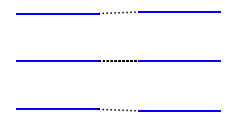

In [52]:
energy_level_diagram([H0, Hd], figsize=(4,2));


In [53]:
Heff = [H0, [Hd, 'sin(wd*t)']]

args = {'wd': (evals[1]-evals[0])}


In [54]:
psi0 = psi_g

In [55]:
tlist = np.linspace(0.0, 100.0, 500)
result = mesolve(Heff, psi0, tlist, [], [ket2dm(psi_e)], args=args)

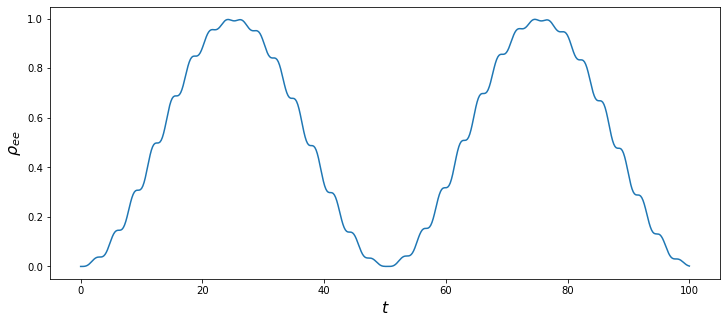

In [56]:
visualize_dynamics(result, r'$\rho_{ee}$');